<a href="https://colab.research.google.com/github/git2101487/DeepLearning2022Late/blob/main/DogVsCat2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keras を使用したディープラーニングをやってみる
## 画像認識を行う

### ライブラリの読み込み

In [11]:
%matplotlib inline
from keras.applications.vgg16 import VGG16,preprocess_input, decode_predictions
from keras.preprocessing import image
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

### 学習済みモデルの読み込み

In [12]:
model = VGG16(weights='imagenet')

### 画像判定のための関数


In [13]:
def predict(filename, featuresize):
  img = image.load_img(filename, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  # 学習モデルで判定を実行
  preds = model.predict(preprocess_input(x))
  results = decode_predictions(preds, top=featuresize)[0]
  return results
# 関数終わり

### 画像表示のための関数

In [14]:
def showimg(filename, title, i):
  im = Image.open(filename) # 画像ファイルを開く
  im_list = np.array(im) # 画像ビットデータをndarrayにする
  plt.subplot(2, 5, i)
  plt.title(title)
  plt.axis("off")
  plt.imshow(im_list)
# 関数終わり

### Kaggleにある画像データを利用する
https://www.kaggle.com/
<br>犬猫判定用の画像データ<br>
https://www.kaggle.com/c/dogs-vs-cats/data

## 指定されたURLからファイルをダウンロードする

In [15]:
# wgetでwebからファイルをダウンロードする
# GoogleColabでコマンドを実行する時は、先頭に!マークを必ずつけること
# 小さいファイルをGoogleドライブからDLする時は、URLをつけるだけでOK

!wget --load-cookies /tmp/cookies.txt "https://drive.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://drive.google.com/uc?export=download&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2" -O train.zip && rm -rf /tmp/cookies.txt
!wget --load-cookies /tmp/cookies.txt "https://drive.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://drive.google.com/uc?export=download&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2" -O test.zip && rm -rf /tmp/cookies.txt

--2022-10-04 01:06:10--  https://drive.google.com/uc?export=download&confirm=t&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2
Resolving drive.google.com (drive.google.com)... 172.217.204.101, 172.217.204.139, 172.217.204.113, ...
Connecting to drive.google.com (drive.google.com)|172.217.204.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-1s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/1drd9edcuubig6t4lc6oag8m49d5583g/1664845500000/14334177730080324288/*/1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2?e=download&uuid=8415bf9e-d53d-425a-a278-3e171c86a3c4 [following]
--2022-10-04 01:06:10--  https://doc-0k-1s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/1drd9edcuubig6t4lc6oag8m49d5583g/1664845500000/14334177730080324288/*/1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2?e=download&uuid=8415bf9e-d53d-425a-a278-3e171c86a3c4
Resolving doc-0k-1s-docs.googleusercontent.com (doc-0k-1s-docs.googleusercontent.com)... 173.194

## Colbに自分のGooglアカウントのドライブをマウントする

In [16]:
# Googleドライブを操作するモジュールをimport
from google.colab import drive
# Googleドライブをマウント
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## DLしてきたファイルをマウントしたディレクトリにコピーする

In [17]:
# コピーファイルを置くディレクトリを作る
import os
dir_path = "/content/drive/My Drive/2022LATE"
# すでにディレクトリがあってもエラーにしない
os.makedirs(dir_path, exist_ok=True)
!pwd # 今いるディレクトリを表示
# ファイルをコピー
!cp train.zip "/content/drive/My Drive/2022LATE"
# test.zipはいったん使わないのでコピーしない

/content


# GoogleドライブからColabへファイルをコピー

In [18]:
!cp "/content/drive/My Drive/2022LATE/train.zip" .

## zipファイルを解凍する

In [19]:
# unzipコマンドで解凍
!unzip -o -q "train.zip"
print("zip解凍完了")

zip解凍完了


## 解凍した画像を使って画像判定させる

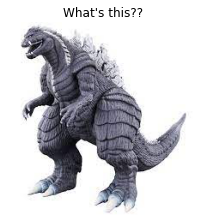

('n01704323', 'triceratops', 0.91854215)
('n01817953', 'African_grey', 0.048207175)
('n01622779', 'great_grey_owl', 0.0031661699)
('n02504458', 'African_elephant', 0.0023836577)
('n01667778', 'terrapin', 0.0021528597)
('n01818515', 'macaw', 0.002077994)
('n01871265', 'tusker', 0.0014395621)
('n03627232', 'knot', 0.0014182795)
('n02124075', 'Egyptian_cat', 0.0010103876)
('n01665541', 'leatherback_turtle', 0.00093069195)


In [21]:
# 画像を指定する変数
# filename = "train/cat.101.jpg"
filename = "ダウンロード.jpg"
plt.figure(figsize=(20, 10))
for i in range(1):
  showimg(filename, "What's this??", i+1)
# ループ終わり
plt.show()

# 表示した画像を判定
results = predict(filename, 10)
for result in results:
  print(result)